In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv( 'TravelInsurance.csv' )
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [3]:
df.info()#info dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [4]:
df.isnull().any() #mendeteksi missing value

Unnamed: 0             False
Age                    False
Employment Type        False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool

In [5]:
num_cols = df.describe(exclude='object')
col_names = num_cols.columns
col_names

Index(['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object')

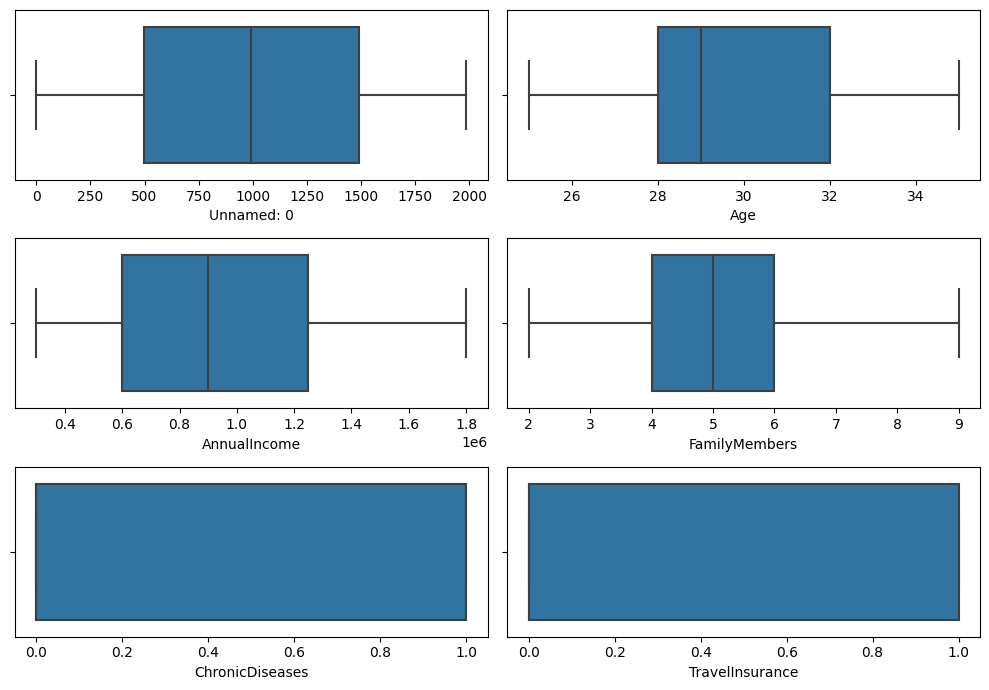

In [6]:
fig = plt.figure(figsize = (10,7))

for i in range (6):
    fig.tight_layout()
    
    grid_col = "32{}".format(i+1)
    
    ax = fig.add_subplot(int(grid_col))
    
    sns.boxplot(data=df, x=col_names[i], ax = ax)

plt.show()

In [7]:
df = df.drop(columns= ["Unnamed: 0"], axis =1)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [8]:
df[['FrequentFlyer', 'EverTravelledAbroad', 'GraduateOrNot', 'Employment Type']] = df[['FrequentFlyer', 'EverTravelledAbroad','GraduateOrNot','Employment Type']].apply(preprocessing.LabelEncoder().fit_transform)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


<Axes: xlabel='AnnualIncome'>

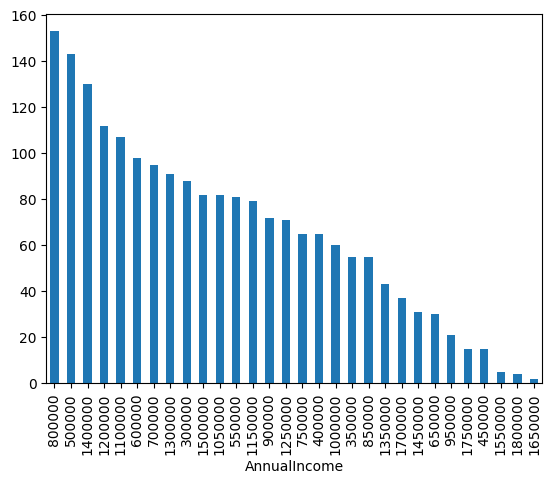

In [9]:
df['AnnualIncome'].value_counts().plot(kind='bar')

In [10]:
df['AnnualIncome'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(-1,1))

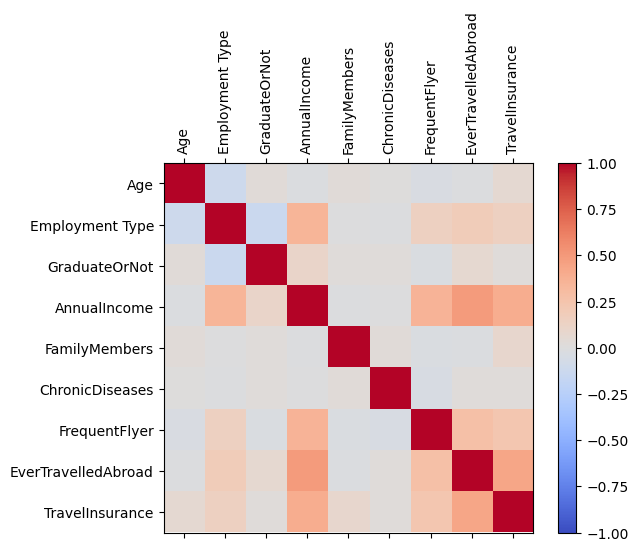

In [11]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [12]:
df.duplicated().sum()

738

df.drop_duplicates(subset=['Age','Employment Type','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','TravelInsurance'], keep='last', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   int32  
 2   GraduateOrNot        1987 non-null   int32  
 3   AnnualIncome         1987 non-null   float64
 4   FamilyMembers        1987 non-null   int64  
 5   ChronicDiseases      1987 non-null   int64  
 6   FrequentFlyer        1987 non-null   int32  
 7   EverTravelledAbroad  1987 non-null   int32  
 8   TravelInsurance      1987 non-null   int64  
dtypes: float64(1), int32(4), int64(4)
memory usage: 108.8 KB


In [14]:
y=df.TravelInsurance
x=df.drop('TravelInsurance',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(x_train,y_train)
predicted = clf.predict(x_test)

print(f'confsion matrix:\n {confusion_matrix(y_test, predicted)}')
print('==================================================')
print(classification_report(y_test, predicted,zero_division=0))

confsion matrix:
 [[238  19]
 [ 72  69]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       257
           1       0.78      0.49      0.60       141

    accuracy                           0.77       398
   macro avg       0.78      0.71      0.72       398
weighted avg       0.77      0.77      0.76       398



In [19]:
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier().fit(x_train,y_train)
predicted = clf.predict(x_test)

In [20]:
print(f'confsion matrix:\n {confusion_matrix(y_test, predicted)}')
print('==================================================')
print(classification_report(y_test, predicted))

confsion matrix:
 [[230  27]
 [ 48  93]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       257
           1       0.78      0.66      0.71       141

    accuracy                           0.81       398
   macro avg       0.80      0.78      0.79       398
weighted avg       0.81      0.81      0.81       398



In [21]:
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier().fit(x_train,y_train)
predicted = clf.predict(x_test)

In [22]:
print(f'confsion matrix:\n {confusion_matrix(y_test, predicted)}')
print('==================================================')
print(classification_report(y_test, predicted))

confsion matrix:
 [[234  23]
 [ 51  90]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       257
           1       0.80      0.64      0.71       141

    accuracy                           0.81       398
   macro avg       0.81      0.77      0.79       398
weighted avg       0.81      0.81      0.81       398



In [23]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       257
           1       0.83      0.64      0.72       141

    accuracy                           0.83       398
   macro avg       0.83      0.78      0.80       398
weighted avg       0.83      0.83      0.82       398



In [24]:
import xgboost as xgb
param_grid = {
    'learning_rate' : [0.1, 0.2, 0.3],
    'max_depth' : [3, 5, 7],
    'min_child_weight' : [1, 3, 5],
    'subsample' : [0.8, 0.9],
    'colsample_bytree' : [0.8, 0.9]
}

In [25]:
model = xgb.XGBClassifier(objective='binary:logistic')

In [26]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy',cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [27]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [28]:
y_pred = best_model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [29]:
from sklearn.metrics import confusion_matrix
print(f'confsion matrix:\n {confusion_matrix(y_test, predicted)}')
print('==================================================')
print(classification_report(y_test, predictions))

confsion matrix:
 [[239  18]
 [ 51  90]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       257
           1       0.98      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.89      0.78      0.80       398
weighted avg       0.87      0.84      0.83       398

